# Porto Seguro’s Safe Driver Prediction

In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline

## Metric

In [10]:
#The function used in most kernels
import numpy as np

def gini(list_of_values):
  sorted_list = sorted(list(list_of_values))
  height, area = 0, 0
  for value in sorted_list:
    height += value
    area += height - value / 2.
  fair_area = height * len(list_of_values) / 2
  return (fair_area - area) / fair_area
  
def normalized_gini(y,y_pred):
    normalized_gini = gini(y_pred)/gini(y)
    return normalized_gini

# Import Data

In [11]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [12]:
df_train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [13]:
df_test.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1


In [14]:
df_train.shape, df_test.shape

((595212, 59), (892816, 58))

In [15]:
# input NaN instead of -1 for missing values
df_train = df_train.replace(-1, np.NaN)


In [16]:
# drop id column
df_train = df_train.drop(['id'],axis=1)

In [17]:
#bin to indicate binary features and cat to indicate categorical features. 
#Features without these designations are either continuous or ordinal. 
#Values of -1 indicate that the feature was missing from the observation. 
# The target columns signifies whether or not a claim was filed for that policy holder.
cols = df_train.columns
cols

Index([u'target', u'ps_ind_01', u'ps_ind_02_cat', u'ps_ind_03',
       u'ps_ind_04_cat', u'ps_ind_05_cat', u'ps_ind_06_bin', u'ps_ind_07_bin',
       u'ps_ind_08_bin', u'ps_ind_09_bin', u'ps_ind_10_bin', u'ps_ind_11_bin',
       u'ps_ind_12_bin', u'ps_ind_13_bin', u'ps_ind_14', u'ps_ind_15',
       u'ps_ind_16_bin', u'ps_ind_17_bin', u'ps_ind_18_bin', u'ps_reg_01',
       u'ps_reg_02', u'ps_reg_03', u'ps_car_01_cat', u'ps_car_02_cat',
       u'ps_car_03_cat', u'ps_car_04_cat', u'ps_car_05_cat', u'ps_car_06_cat',
       u'ps_car_07_cat', u'ps_car_08_cat', u'ps_car_09_cat', u'ps_car_10_cat',
       u'ps_car_11_cat', u'ps_car_11', u'ps_car_12', u'ps_car_13',
       u'ps_car_14', u'ps_car_15', u'ps_calc_01', u'ps_calc_02', u'ps_calc_03',
       u'ps_calc_04', u'ps_calc_05', u'ps_calc_06', u'ps_calc_07',
       u'ps_calc_08', u'ps_calc_09', u'ps_calc_10', u'ps_calc_11',
       u'ps_calc_12', u'ps_calc_13', u'ps_calc_14', u'ps_calc_15_bin',
       u'ps_calc_16_bin', u'ps_calc_17_bin', u'ps_c

0    573518
1     21694
Name: target, dtype: int64


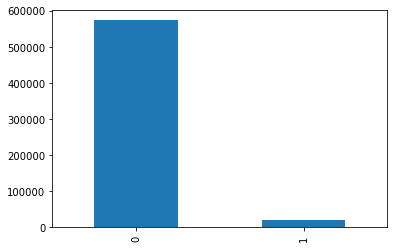

In [18]:
# number of target values
print df_train['target'].value_counts()
df_train['target'].value_counts().plot(kind='bar')
plt.show()

#### Handgling missing values

In [19]:
# missing values
mis = df_train.isnull().sum()
mis[np.argsort(mis)[::-1]][:15]

ps_car_03_cat    411231
ps_car_05_cat    266551
ps_reg_03        107772
ps_car_14         42620
ps_car_07_cat     11489
ps_ind_05_cat      5809
ps_car_09_cat       569
ps_ind_02_cat       216
ps_car_01_cat       107
ps_ind_04_cat        83
ps_car_11             5
ps_car_02_cat         5
ps_car_12             1
ps_ind_17_bin         0
ps_reg_02             0
dtype: int64

In [20]:
# drop columns with high missing values
df_train = df_train.drop(['ps_car_03_cat','ps_car_05_cat','ps_reg_03'],axis=1)

In [21]:
df_train = df_train.dropna(axis=0)

In [22]:
# we havent lost too much data
df_train['target'].value_counts()

0    522710
1     19150
Name: target, dtype: int64

# EDA

In [23]:
cols = df_train.columns

## Categorical vars

In [24]:
cols_cat = [e for e in cols[1:]  if e.endswith('cat')]

In [25]:
lc = len(cols_cat)
lc

12

#### Percentage dist of target values by categorical values

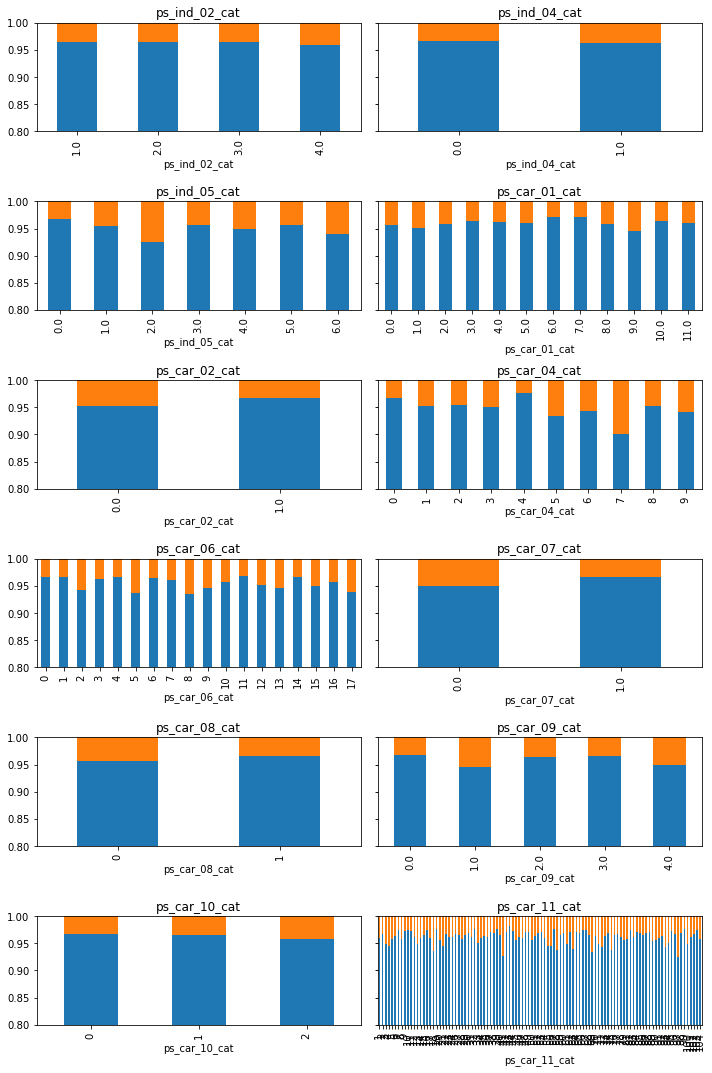

In [85]:
fig, axes = plt.subplots(nrows=6, ncols=2)
k,i=0,0
for e in cols_cat:
    sex_xt = pd.crosstab(df_train[e],df_train['target'])
    sex_xt_norm = sex_xt.apply(lambda x : x/np.sum(sex_xt,axis=1))
    sex_xt_norm.plot(kind='bar', stacked=True, 
                     ax=axes[k,i],figsize=(10,15),
                     sharex=False, sharey=True,
                     title=e, legend=False, ylim=[.8,1] )
    i+=1
    if i==2:
        i=0
        k+=1
plt.tight_layout()

## Other vars

In [86]:
cols_others = [e for e in cols[1:]  if not e.endswith(('cat','bin'))]

In [87]:
lo = len(cols_others)
lo

25

#### Distribution of other variables by target values

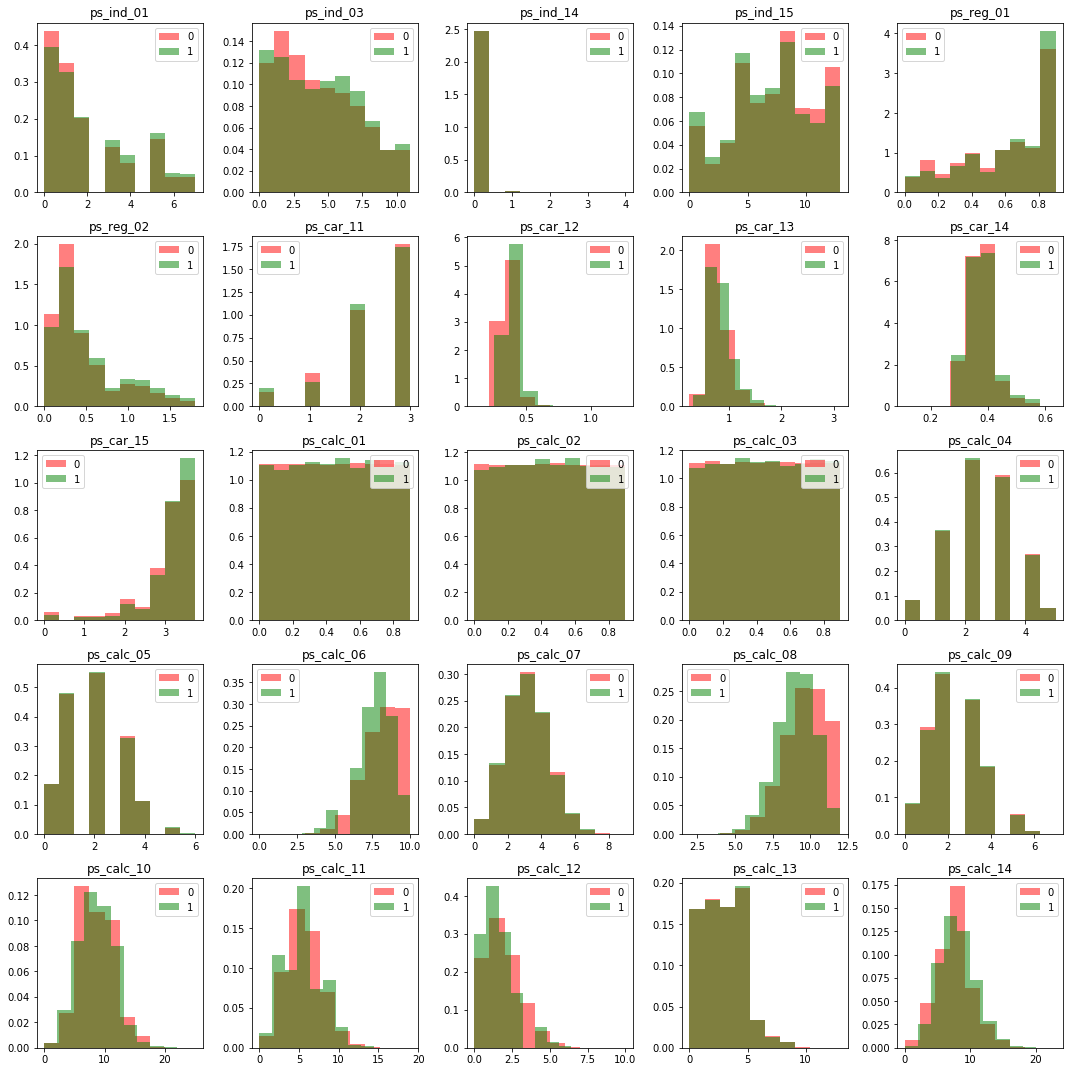

In [88]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15,15))
k,i=0,0
for e in cols_others:
    axes[k,i].hist(df_train[df_train.target==0][e], alpha=0.5, normed=True,color='red',label="0")
    axes[k,i].hist(df_train[df_train.target==1][e], alpha=0.5, normed=True,color='green',label='1')
    axes[k,i].set_title(e)
    axes[k,i].legend()
    i+=1
    if i==5:
        i=0
        k+=1
plt.tight_layout()

## Binary Values

In [89]:
bins = [e for e in cols[1:]  if e.endswith(('bin'))]

In [90]:
lb = len(bins)
lb

17

#### Percentage dist of target values by binary values

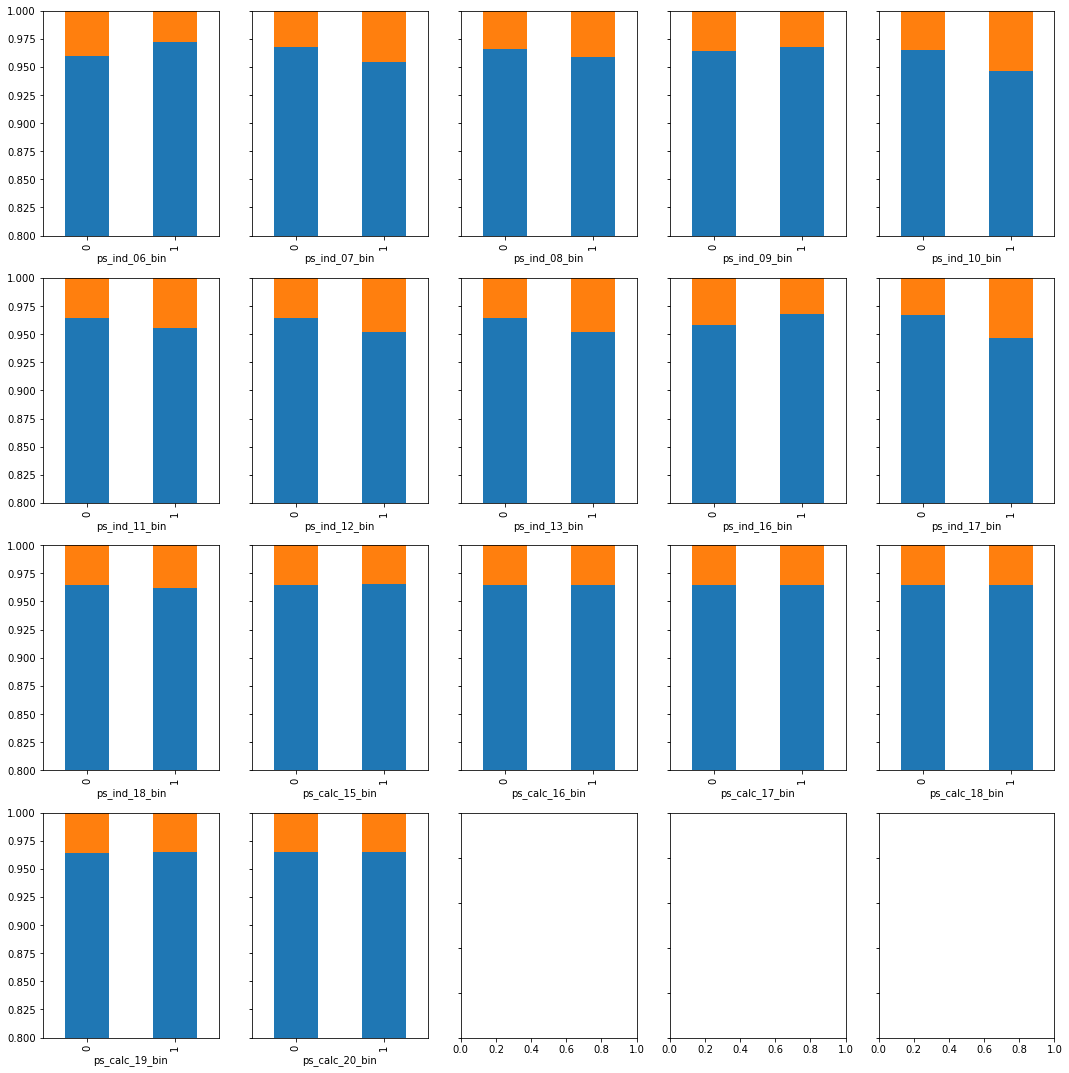

In [91]:
fig, axes = plt.subplots(nrows=4, ncols=5)
k,i=0,0
for e in bins:
    sex_xt = pd.crosstab(df_train[e],df_train['target'])
    sex_xt_norm = sex_xt.apply(lambda x : x/np.sum(sex_xt,axis=1))
    sex_xt_norm.plot(kind='bar', stacked=True, 
                     ax=axes[k,i],figsize=(15,15),
                     legend=False,ylim=[.8,1], 
                     sharex=False, sharey=True,)
    i+=1
    if i==5:
        i=0
        k+=1
        
plt.tight_layout()

#### Percentage dist of binary values by target values

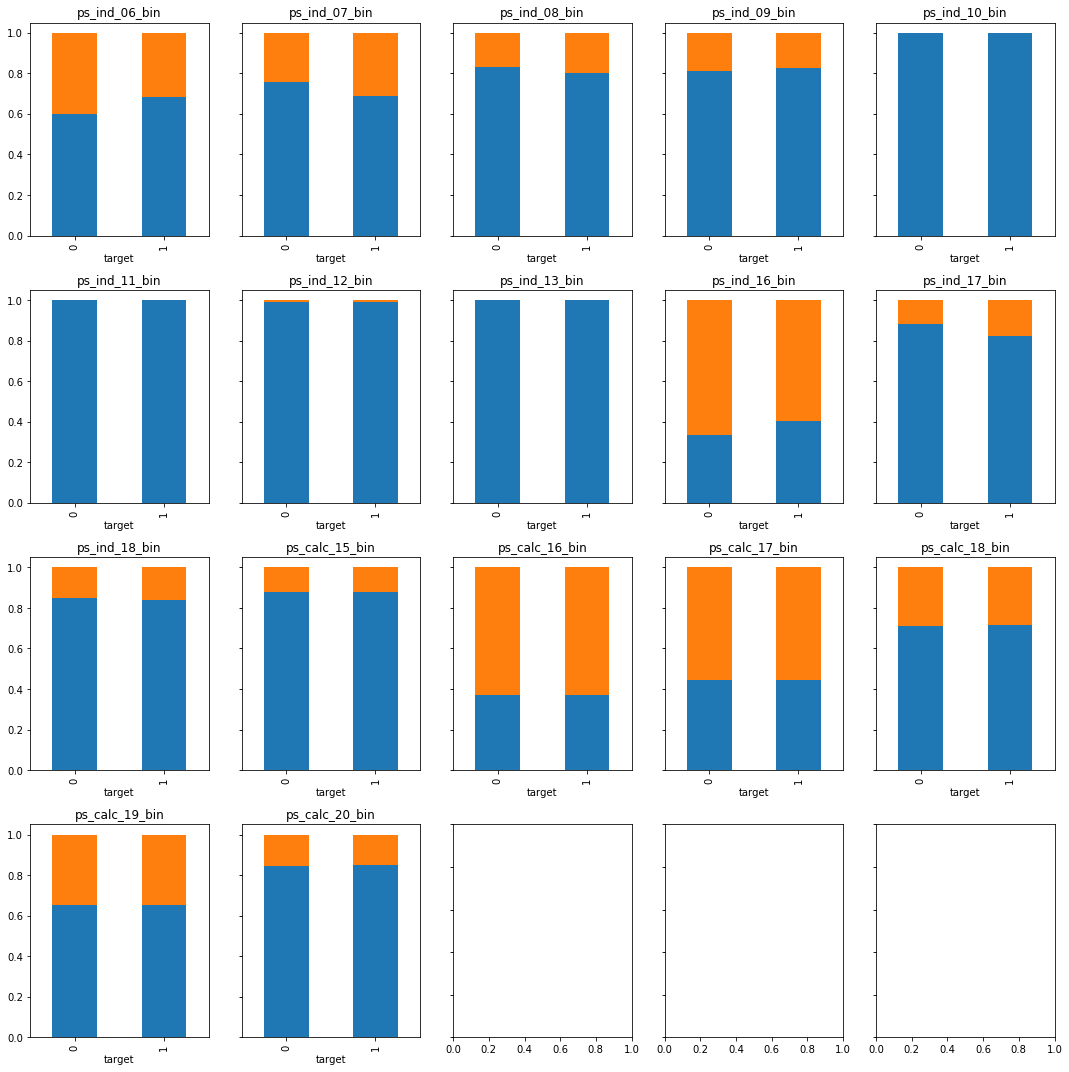

In [92]:
fig, axes = plt.subplots(nrows=4, ncols=5)
k,i=0,0
for e in bins:
    sex_xt = pd.crosstab(df_train['target'],df_train[e])
    sex_xt_norm = sex_xt.apply(lambda x : x/np.sum(sex_xt,axis=1))
    sex_xt_norm.plot(kind='bar', stacked=True, 
                     ax=axes[k,i],figsize=(15,15),
                     sharex=False, sharey=True,
                     title=e, legend=False )
    i+=1
    if i==5:
        i=0
        k+=1
plt.tight_layout()

# Learning

#### Create dummies for categorical variables

In [37]:
df_train_b = df_train.copy()

In [38]:
for e in cols_cat:
    df_train_b = pd.concat([df_train_b,pd.get_dummies(df_train[e],prefix=e)], axis=1 )

#### Drop irrelevant columns

In [39]:
df_train_b = df_train_b.drop(cols_cat,axis=1)

In [40]:
col_df = df_train_b.columns
col_df

Index([u'target', u'ps_ind_01', u'ps_ind_03', u'ps_ind_06_bin',
       u'ps_ind_07_bin', u'ps_ind_08_bin', u'ps_ind_09_bin', u'ps_ind_10_bin',
       u'ps_ind_11_bin', u'ps_ind_12_bin',
       ...
       u'ps_car_11_cat_95', u'ps_car_11_cat_96', u'ps_car_11_cat_97',
       u'ps_car_11_cat_98', u'ps_car_11_cat_99', u'ps_car_11_cat_100',
       u'ps_car_11_cat_101', u'ps_car_11_cat_102', u'ps_car_11_cat_103',
       u'ps_car_11_cat_104'],
      dtype='object', length=212)

In [ ]:
df_train_X = df_train_b.iloc[:,1:].values
df_train_y = df_train_b.iloc[:,0].values

In [ ]:
df_train_X.shape, df_train_y.shape

#### Split the data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split( df_train_X, df_train_y, 
                     test_size=0.3, random_state=0,stratify=df_train_y)

In [ ]:
# see if stratify worked
print np.sum(y_train)/ len(y_train)
print np.sum(y_test)/ len(y_test)

#### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(learning_rate=0.03, subsample=.9, 
                                max_depth=5, max_features='auto')
gb

In [ ]:
gb.fit(X_train,y_train)

In [ ]:
gb.score(X_test,y_test)

In [ ]:
normalized_gini(y_test, gb.predict_proba(X_test)[:,1])

#### Pickle object

In [ ]:
import os
print os.listdir('./')

In [ ]:
# os.makedirs('pkl_objects')

# import pickle
# pickle.dump(gb, open(os.path.join('pkl_objects', 'gb.pkl'), 'wb'), protocol=2)

# Submit

In [28]:
df_test = df_test.replace(-1, np.NaN)

In [29]:
test = df_test.drop(['ps_car_03_cat','ps_car_05_cat','ps_reg_03'],axis=1)
test.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1.0,8,1.0,0.0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2.0,5,1.0,0.0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1.0,3,0.0,0.0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1.0,6,0.0,0.0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1.0,7,0.0,0.0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1


#### Impute missing values

In [30]:
# missing values
mis_t = test.isnull().sum()
mis_t[np.argsort(mis_t)[::-1]][:15]

ps_car_14        63805
ps_car_07_cat    17331
ps_ind_05_cat     8710
ps_car_09_cat      877
ps_ind_02_cat      307
ps_car_01_cat      160
ps_ind_04_cat      145
ps_car_02_cat        5
ps_car_11            1
ps_ind_15            0
ps_car_04_cat        0
ps_reg_02            0
ps_reg_01            0
ps_ind_18_bin        0
ps_ind_17_bin        0
dtype: int64

In [31]:
for e in mis_t[mis_t>0].keys():
    value = test[e].value_counts().idxmax()
    test[e] = test[e].fillna(value)

#### Create dummies for categorical variables

In [32]:
test_b = test.copy()

In [33]:
for e in cols_cat:
    test_b = pd.concat([test_b,pd.get_dummies(test_b[e],prefix=e)], axis=1 )

#### Drop irrelevant columns

In [34]:
test_b = test_b.drop(cols_cat,axis=1)

In [41]:
col_t = test_b.columns
print len(col_df),len(col_t)

212 214


In [80]:
test_b_col = test_b[df_train_b.columns[1:]]

In [81]:
test_b_col = test_b_col.values

#### Pickle call

In [26]:
import pickle

In [27]:
gb = pickle.load(open('./pkl_objects/gb.pkl', 'rb'))

In [82]:
preds = gb.predict_proba(test_b_col)[:,1]

In [83]:
df_submit = pd.DataFrame({'id':df_test.id,'target':preds},index=range(preds.shape[0]))

In [84]:
df_submit.head()

,id,target
0,0,0.029610
1,1,0.027306
2,2,0.032169
3,3,0.018943
4,4,0.035050


In [77]:
df_submit.to_csv('./submit.csv',index=False)